# Knn Regression

1. Choose K (the number of clusters you want).

2. Initialize K centroids randomly.

3. Repeat until convergence:
   a. Assign each data point to the nearest centroid.
   b. Recalculate the centroids based on the current assignment of data points.
   
4. Return the final K centroids and the corresponding cluster assignments.


In [517]:
# import modules 
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline 

In [518]:
df = pd.read_csv('../cleaning-preprocessing/cleaned_flight_data_with_target.csv')
# df.head(5)

In [519]:
df = df.astype(int)
# df.head(5)

In [520]:
X = df.drop(columns=['DEP_DELAY'])  # Feature matrix
y = df['DEP_DELAY']  # Target variable

y.head(10)

0    -1
1    -7
2    40
3    -2
4    -4
5    -1
6    -1
7    -5
8     0
9     3
Name: DEP_DELAY, dtype: int64

### Feature Selection

In [521]:
from sklearn.feature_selection import SelectKBest, f_regression
from sklearn.preprocessing import StandardScaler

# Standardize numerical features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Apply SelectKBest with f_regression
k = 15  # Number of top features to select
selector = SelectKBest(score_func=f_regression, k=k)
X_selected = selector.fit_transform(X_scaled, y)

# Get selected feature names
selected_features = X.columns[selector.get_support()]
feature_scores = selector.scores_[selector.get_support()]

# Create a DataFrame with feature names and scores
feature_df = pd.DataFrame({'Feature': selected_features, 'F-Score': feature_scores})
feature_df = feature_df.sort_values(by='F-Score', ascending=False)

# Print the selected features
print("Selected Features:")
print(feature_df)
# print(feature_df['Feature'])


Selected Features:
                            Feature     F-Score
2                         CRS_DEP_M  305.282414
5                        Wind Speed  132.760726
8                           sch_dep  123.988098
7                          Pressure   80.475920
0                             MONTH   62.326500
6                         Wind Gust   56.768934
3                         CRS_ARR_M   55.116001
13     Condition_Light Snow / Windy   52.564230
10                         DEST_LAX   38.766920
1                      DAY_OF_MONTH   38.692254
14  Condition_Partly Cloudy / Windy   36.341232
11         Condition_Cloudy / Windy   34.950086
12             Condition_Heavy Rain   30.852279
4                       Temperature   30.023830
9              OP_UNIQUE_CARRIER_B6   28.825082


In [522]:
from sklearn.model_selection import train_test_split 
X_train, X_test, y_train, y_test = train_test_split(X[feature_df['Feature']], y, test_size = 0.25, random_state = 0)

In [523]:
X_train

,CRS_DEP_M,Wind Speed,sch_dep,Pressure,MONTH,Wind Gust,CRS_ARR_M,Condition_Light Snow / Windy,DEST_LAX,DAY_OF_MONTH,Condition_Partly Cloudy / Windy,Condition_Cloudy / Windy,Condition_Heavy Rain,Temperature,OP_UNIQUE_CARRIER_B6
5823,1077,9,35,29,11,18,1279,0,0,18,0,0,0,40,1
897,1375,12,21,30,11,0,18,0,0,3,0,0,0,48,1
2739,899,10,26,30,11,0,1050,0,0,9,0,0,0,39,1
6162,1035,12,30,29,11,0,1259,0,0,19,0,0,0,46,0
2503,1125,22,39,30,11,30,1282,0,0,8,0,0,0,34,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13123,420,5,19,30,12,0,565,0,0,13,0,0,0,38,0
19648,525,8,54,29,1,0,671,0,0,3,0,0,0,44,0
9845,515,13,53,29,12,0,807,0,0,1,0,0,0,32,0
10799,580,15,32,29,12,0,675,0,0,5,0,0,0,42,0


In [524]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [525]:
from sklearn.neighbors import KNeighborsRegressor
# weights='distance'
regressor = KNeighborsRegressor(n_neighbors=19, metric='manhattan')
regressor.fit(X_train, y_train)

KNeighborsRegressor(metric='manhattan', n_neighbors=19)

In [526]:
y_pred = regressor.predict(X_test)

In [527]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("\nModel Performance Metrics:")
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"R-Squared (R2): {r2:.4f}")


Model Performance Metrics:
Mean Squared Error (MSE): 1660.31
Mean Absolute Error (MAE): 14.53
R-Squared (R2): 0.0968


In [528]:
# from sklearn.model_selection import GridSearchCV

# param_grid = {'n_neighbors': range(3, 21, 2)}
# grid = GridSearchCV(KNeighborsRegressor(), param_grid, cv=5, scoring='r2')
# grid.fit(X_train, y_train)
# print("Best k:", grid.best_params_)

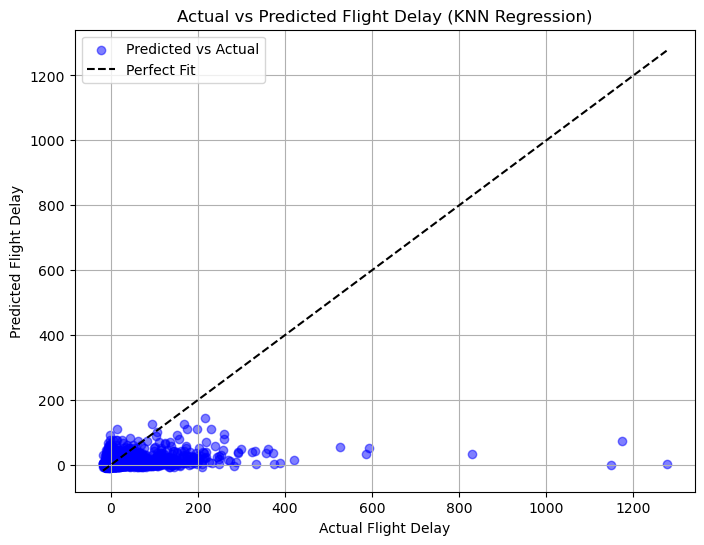

In [529]:
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, color='blue', alpha=0.5, label="Predicted vs Actual")
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='black', linestyle='--', label="Perfect Fit")

plt.xlabel("Actual Flight Delay")
plt.ylabel("Predicted Flight Delay")
plt.title("Actual vs Predicted Flight Delay (KNN Regression)")
plt.legend()
plt.grid(True)
plt.show()